# E-commerce — Выявление профилей потребления.

Ссылка на <a href="https://disk.yandex.ru/i/NnuuseaZ6vXwWw" target="_blank">презентацию</a>.

## Описание данных

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».  
Колонки:  
``` date ``` — дата заказа;  
``` customer_id ``` — идентификатор покупателя;  
``` order_id ``` — идентификатор заказа;  
``` product ``` — наименование товара;  
``` quantity ``` — количество товара в заказе;  
``` price ``` — цена товара.

## Цель исследования

- Изучить продажи интернет-магазина товаров для дома и быта “Пока все ещё тут”
- Сегментировать покупателей интернет-магазина для эффективной персонализированной рассылки рекламных предложений
- Предоставить рекомендации по каждому сегменту


## План работы 

1)  Предобработка данных  
-  Проверить типы данных и привести их к нужным;  
-  Привести текстовые данные к единому виду lowercase;  
-  Проверить данные на пропуски;  
-  Исследовать дубликаты;  
-  Удалить дубликаты;  
-  Проверить корректность наименований колонок;   

2)  Исследовательский анализ данных    
-  Проверить данные на предмет аномалий и избавиться от них;  
-  Посчитать количество уникальных покупателей, средний чек каждого покупателя, среднее число позиций в заказе, посмотреть на данные в динамике, построив диаграммы.  
-  Создать колонку с общей суммой каждой покупки (quantity * price);  
-  Проанализировать покупки и сегментировать товары по товарным категориям. Создать колонку для указания соответствующей товарной категории каждой покупке;  
-  Для проверки сезонности продаж создать колонку с месяцем продажи;  
-  Определить наиболее наиболее продаваемые категории товаров  
-  С помощью графика определить наиболее продаваемые категории товаров по месяцам  

3)  Разделение пользователей на сегменты  
- Проведение сегментации методом RFM анализа по трём критериям с оценками от 1 до 3  
- Укрупним полученные сегменты и создадим на их основе 5 классов пользователей    

4)  Статистические гипотезы
- Проверим данные на нормальность распределения
- Смормулируем и проверим статистические гипотезы.    

5)  Напишем выводы, определим как стоит действовать с каждым из созданных классов пользователей

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [4]:
df_start = df.shape[0]
df_start

7474

Количество строк в датафрейме - 7474. Сохраним это число в переменную df_start.  
Пропусков нет  
Колонки проименованы корректно

В колонке date находится дата в формате год\месяц\день\час с типом данных int64. Сменим тип на datetime для возможности дальнейшей работы с данными.  
Остальные типы данных оставим как есть.

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [6]:
print('Самая ранняя дата:', df['date'].min())
print('Самая поздняя дата:', df['date'].max())

Самая ранняя дата: 2018-10-01 00:00:00
Самая поздняя дата: 2020-01-31 15:00:00


Для поиска дубликатов, чтобы найти в т.ч. неявные дубликаты, приведём колонку product к единому виду lowercase

In [7]:
df['product'] = df['product'].apply(str.lower)
df.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [8]:
# проверим данные на полные дубликаты
df[df.duplicated()].count()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Дубликатов нет, но мы не уверены в корректности выгрузки, возможно её делали из нескольких источников и могли быть проблемы с датами, поищем ещё раз дубликаты без учёта дат.

In [9]:
df[df.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])].count()

date           1864
customer_id    1864
order_id       1864
product        1864
quantity       1864
price          1864
dtype: int64

1864 повторяющихся строки. Для дальнейшего анализа удалим эти строки.

In [10]:
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.8+ KB


Проверим есть ли заказы, где встречается более одного уникального customer_id

In [11]:
grouped = df.groupby('order_id')['customer_id'].nunique()
id_to_remove = grouped[grouped > 1].index
print('Количество заказов с не уникальными id покупателя:', len(id_to_remove))

Количество заказов с не уникальными id покупателя: 29


In [12]:
# удалим строки, содержащие эти заказы
df = df.drop(df[df['order_id'].isin(id_to_remove)].index)

In [13]:
print('Число строк после предобработки:', df.shape[0])
print('% потерянных данных:', round((1- (df.shape[0]/df_start))*100,1) )


Число строк после предобработки: 5544
% потерянных данных: 25.8


Вывод.   
Мы выгрузили датафрейм, содержащий позиции из заказов пользователей: номер пользователя, номер заказа, количество, цену и название товара.   
Заказы были сделаны в интервале: с 2018-10-01 до 2020-01-31  
Количество строк в датафрейме - 7474. Сохранили это число в переменную df_start.     
Пропусков нет, колонки проименованы корректно.  
Сменили тип данных колонки date на datetime для возможности дальнейшей работы с данными, как с датой.  
Остальные типы данных оставили как есть.  
Для поиска дубликатов, чтобы найти в т.ч. неявные дубликаты, привели колонку product к единому виду lowercase.  
Полных дубликатов найдено не было, но т.к. мы не уверены в корректности выгрузки, возможно её делали из нескольких источников и могли быть проблемы с датами, проверили ещё раз на дубликаты без учёта дат. Было найдено и удалено 1864 повторяющихся строки.
Также были найдены и удалены заказы, сделанные разными пользователями.   
После предобработки осталось 5544 строки, было удалено 25,8 % данных. 

## Исследовательский анализ данных

### Количество клиентов и заказов

In [14]:
unique_users_count = len(df['customer_id'].unique())
unique_orders_count = len(df['order_id'].unique())
print('Количество уникальных клиентов:', unique_users_count)
print('Количество уникальных заказов:', unique_orders_count)
print('Количество заказов на каждого клиента:', round(unique_orders_count/unique_users_count, 2))

Количество уникальных клиентов: 2413
Количество уникальных заказов: 3492
Количество заказов на каждого клиента: 1.45


In [15]:
# добавим столбец с месяцем и годом покупки
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(5)

,date,customer_id,order_id,product,quantity,price,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018


Так как в настоящий момент конфигурация таблицы такова, что каждая строчка это не отдельный заказ, а отдельная товарная позиция в каждом из заказов, то сгрупируем её таким образом, чтобы у нас были суммарные заказы по месяцам каждого года

In [16]:
# создадим датасет только с уникальными order_id и сгруппируем по каждому месяцу
unique_orders = df.drop_duplicates(subset=['order_id'])
unique_orders_by_month = unique_orders.groupby(by=['year', 'month'], as_index = False).agg({'order_id':'count'})

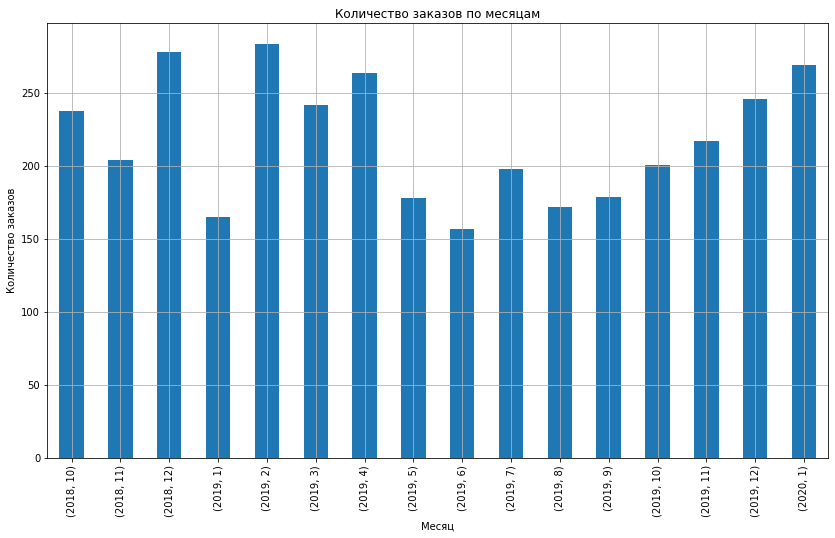

In [17]:
unique_orders.groupby(['year', 'month'])['order_id'].count().plot(
    kind='bar', figsize=(14,8), grid=True,
    title='Количество заказов по месяцам',
    xlabel= 'Месяц', ylabel= 'Количество заказов'
) ;

Количество заказов варьируется от месяца к месяцу.  
Меньше всего заказов было сделано в июне 2019 г.
Больше всего в декабре 18го и феврале 19гг., а также апреле 19го и январе 20го. В целом видна закономерность большего числа заказов в зимние и весенние месяцы, чем в летние.

### Средний чек

Создадим колонку purchase_amount с суммой каждой покупки

In [18]:
df['purchase_amount'] = df['quantity'] * df['price']
df.sample(5)

,date,customer_id,order_id,product,quantity,price,month,year,purchase_amount
6503,2019-10-03 13:00:00,7abce1cc-bc8c-4362-b61a-0cbb4822ed29,72844,сумка-тележка хозяйственная rolser jet joy син...,1,3975.0,10,2019,3975.0
2714,2019-04-07 14:00:00,9c59ebc7-39e2-49f8-b817-4113824522f8,14621,рассада зелени для кухни розмарин блю лагун ди...,1,119.0,4,2019,119.0
5900,2019-07-20 12:00:00,1046d601-0ec2-4038-a1d9-ede848cf5509,14903,однолетнее растение бегония вечноцветущая в ка...,8,82.0,7,2019,656.0
3565,2019-05-12 19:00:00,3d5fef90-4a65-4a7e-84cf-010eba7b038d,14753,патиссон диск раннеспелый d-7 см,1,15.0,5,2019,15.0
5442,2019-06-18 09:00:00,b3a1c618-6267-4a54-81c4-a1bd2d35d00b,71736,пеларгония розебудная prins nikolai укорененны...,2,134.0,6,2019,268.0


In [19]:
df.describe()

,order_id,quantity,price,month,year,purchase_amount
count,5544.000000,5544.000000,5544.00000,5544.000000,5544.000000,5544.000000
mean,55864.753066,2.581890,530.36780,6.667208,2018.829004,829.956605
std,32499.807867,16.477423,973.76826,3.603399,0.488714,9206.162864
min,12624.000000,1.000000,9.00000,1.000000,2018.000000,9.000000
25%,14810.000000,1.000000,90.00000,4.000000,2019.000000,120.000000
50%,69186.000000,1.000000,150.00000,6.000000,2019.000000,194.000000
75%,71934.500000,1.000000,524.00000,10.000000,2019.000000,734.000000
max,112789.000000,1000.000000,14917.00000,12.000000,2020.000000,675000.000000


In [20]:
len(df.query('quantity >= 20'))

93

Мы обязаны обратить внимание, что в колонкe quantity, и, соответственно, и purchase_amount присутствуют аномалии. 
Заказов, где количество одного товара более или равно 20 шт - 93 шт. 
Эти заказы скорее всего корпоративные или коммерческие и работу с этими покупателями стоило бы передать в оптовый отдел, такие клиенты делают заказы по мере своей необходимости, а не после рекламных рассылок. К ним стоит искать индивидуальный подход.
Создадим отдельный датафрейм corp_clients, куда занесём только крупные заказы, а из основного датафрейма их удалим, чтобы они не искажали статистику.

In [21]:
corp_clients = df.query('quantity >= 20')  # заказы с большим количеством товара в заказе сохраняем в отдельный датафрейм
df = df[df['quantity'] < 20] # убираем эти заказы из основного датафрейма
corp_clients


,date,customer_id,order_id,product,quantity,price,month,year,purchase_amount
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,крючок одежный 2-х рожковый серый металлик с п...,96,38.0,10,2018,3648.0
144,2018-10-08 15:00:00,9151d307-654c-4239-a888-ada5ca45f0b2,68571,набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,10,2018,7474.0
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,10,2018,1216.0
164,2018-10-09 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68585,"крючок одежный тройной латунь (б-47), 1110182",25,57.0,10,2018,1425.0
173,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж апельсин 8 см полиуретан,25,51.0,10,2018,1275.0
...,...,...,...,...,...,...,...,...,...
6663,2019-10-20 21:00:00,6583407e-7d0d-4ece-93f8-6f7cb64f9926,73041,искусственный цветок роза закрытая малая пласт...,30,19.0,10,2019,570.0
6678,2019-10-22 16:00:00,511115b7-e981-4069-9e0e-88a3551341a6,73063,муляж яблоко зеленый 9 см полиуретан,50,51.0,10,2019,2550.0
6684,2019-10-23 11:00:00,2fac41bf-e800-4bc3-a4b3-0df800f33e99,73073,"ведро резинопластиковое строительное 12,0 л (м...",50,64.0,10,2019,3200.0
6692,2019-10-25 13:00:00,14cc96d3-7d14-4e84-9c15-76e57b642c72,73092,цветок искусственный нарцисс одиночный в ассор...,25,20.0,10,2019,500.0


In [22]:
# рассчитаем медиану среднего чека по уникальным заказам
df.groupby(by=['order_id']).apply(lambda x: (x['purchase_amount'].sum())).median()

562.0

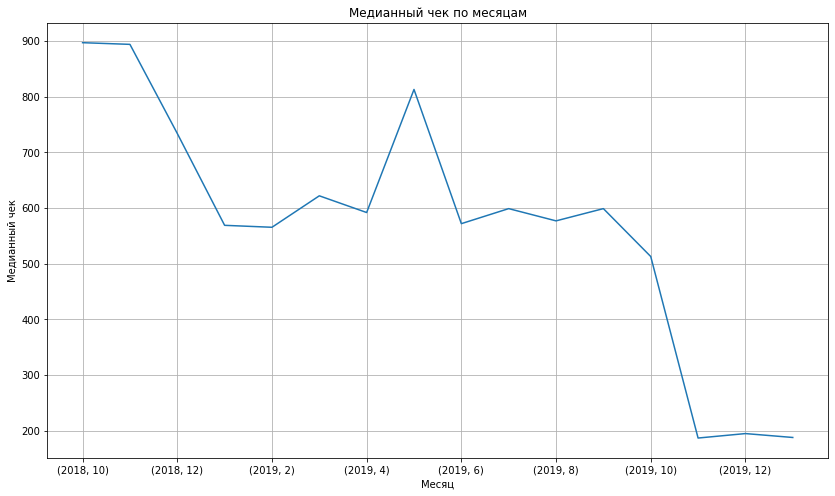

In [23]:
grouped_df = df.groupby(['order_id', 'year', 'month']).sum().reset_index()

# Рассчитаем медиану суммы заказов за каждый месяц
mean_sum_per_month = grouped_df.groupby(['year', 'month'])['purchase_amount'].median()
# Визуализируем изменение медианного чека по месяцам
mean_sum_per_month.plot(
    kind='line', figsize=(14,8), grid=True,
    title='Медианный чек по месяцам',
    xlabel= 'Месяц', ylabel= 'Медианный чек'
) ;

Средний чек падает практически на протяжении всего наблюдения. С 900 он опускается до 200 к концу исследования. Особенно сильные падения были после ноября 2018 г и сентября 2019 г.

### Наиболее продаваемые категории товаров

Для определения наиболее продаваемых категорий товара, нужно эти категории создать и распределить каждый товар по этим категориям. Можно заметить, что первые два слова в колонке product можно использовать, как ключевые.  
Создадим пустой словарь и наполним его парами ключевых слов в качестве ключей и количества встречаний в качестве значений. 

In [24]:
duplicate_elements = {}

for text in df['product']:
    unordered_list = text.split()[:1]
    for item in unordered_list:
        if item in duplicate_elements:
            duplicate_elements[item] += 1
        else: 
            duplicate_elements[item] = 1
marklist = sorted(duplicate_elements.items(), key=lambda x: x[1])
sortdict = dict(marklist)
print(sortdict)

{'радермахера': 1, 'юкка': 1, 'мини-сковорода': 1, 'котел': 1, 'суккулент': 1, 'адиантум': 1, 'готовая': 1, 'противень': 1, 'глоксиния': 1, 'стиральный': 1, 'чистящий': 1, 'светильник': 1, 'жидкое': 1, 'пена': 1, 'сантолина': 1, 'мелисса': 1, 'наматрицник-чехол': 1, 'ножеточка': 1, 'настольная': 1, 'сметка': 1, 'альбука': 1, 'овощечистка': 1, 'артемизия': 1, 'петля-стрела': 1, 'держатель': 1, 'губка': 1, 'фен': 1, 'калоцефалус': 1, 'антижир': 1, 'каллуна': 1, 'капсикум': 1, 'мантоварка': 1, 'ролик': 1, 'сменный': 1, 'морковь': 1, 'шило': 1, 'кухонные': 1, 'картофелемялка': 1, 'бальзам': 1, 'годеция': 1, 'эшшольция': 1, 'рассекатель': 1, 'ополаскиватель': 1, 'подсолнечник': 1, 'пресс': 1, 'ель': 1, 'мыльница': 1, 'защитный': 1, 'многофункциональный': 1, 'фоторамка': 1, 'скиммия': 1, 'кондиционер': 1, 'фарфоровая': 1, 'электроштопор': 1, 'простынь': 1, 'фиттония': 1, 'бульонница': 1, 'мантоварка-пароварка': 1, 'складная': 1, 'фикус': 1, 'защитная': 1, 'вешалка-перекладина': 1, 'кодонанта

In [25]:
product_dict = {
    'сад и огород': ['пеларгония', 'рассада', 'черенок', 'укорененный', 'розебудная', 'растение', 'томата', 'петуния', 'герань'
                        , 'однолетнее', 'роза', 'калибрахоа', 'бакопа', 'цветок', 'базилик', 'мята', 'фуксия', 'декабрист', 'флокс'
                        , 'примула', 'вербена', 'бегония', 'фиалка', 'цикламен', 'лобелия', 'дыня', 'пуансеттия', 'антуриум', 'эвкалипт'
                        , 'тимьян', 'капуста', 'гвоздика', 'комнатное', 'виола', 'бальзамин', 'циперус', 'арбуз', 'газания', 'космея'
                        , 'перчатки', 'колокольчик', 'огурец', 'настурция', 'хризантема', 'петрушка', 'томат', 'львиный', 'алиссум'
                        , 'лаванда', 'ящик', 'афеляндра', 'хлорофитум', 'эхеверия', 'цинния', 'мирт', 'азалия', 'калатея', 'покрытие'
                        , 'зверобой', 'камнеломка', 'клубника', 'портулак', 'тагетис', 'табак', 'котовник', 'вербейник', 'лавр', 'овсянница'
                        , 'спатифиллум', 'дендробиум', 'шнур', 'петля', 'шеффлера', 'мединилла', 'патиссон', 'левкой', 'астра', 'гардения'
                        , 'укроп', 'седум', 'незабудка', 'эхинокактус', 'алоэ', 'аптения', 'фаленопсис', 'сетка', 'кореопсис', 'календула'
                        , 'мимоза', 'измельчитель', 'бензин', 'розмарин', 'цветущее', 'гортензия', 'многолетнее', 'клен', 'лантана', 'физостегия'
                        , 'нивянник', 'цинерания', 'ясколка', 'ранункулус', 'чабер', 'калла', 'земляника', 'аквилегия', 'гипсофила', 'фал'
                        , 'лестница', 'диффенбахия', 'лапчатка', 'каланхое', 'холодная', 'гербера', 'молодило', 'аспарагус', 'салат', 'мешок'
                        , 'хамедорея', 'сельдерей', 'змееголовник', 'шпагат', 'лен', 'осина', 'монарда', 'фатсия', 'сальвия', 'целозия'
                        , 'вероника', 'аргирантерум', 'муррайя', 'колеус', 'пиретрум', 'девичий', 'автоматическая', 'цитрофортунелла'
                        , 'энотера', 'платикодон', 'папоротник', 'бак', 'гиацинт', 'тюльпан', 'нефролепис', 'цикламен,', 'кипарисовик'
                        , 'гиностемма', 'пуансетия', 'бархатцы', 'цинерария', 'кисточка', 'соланум', 'крассула', 'лопатка', 'душица'
                        , 'иссоп', 'кориандр', 'нолина', 'кампанула', 'ерш', 'хризолидокарпус', 'литопс', 'пахира', 'амариллис', 'замиокулькас'
                        , 'веревка', 'импатиенс', 'шприц', 'тыква', 'кабачок', 'вигна', 'шалфей', 'любисток', 'валериана', 'буддлея'
                        , 'анемона', 'лаватера', 'бадан', 'солидаго', 'бузульник', 'пряные', 'сциндапсус', 'барвинок', 'рудбекия', 'гайлардия'
                        , 'хоста', 'драцена', 'мускари', 'агератум', 'баклажан', 'маттиола', 'лук', 'джункус', 'георгина'
                        , 'смолевка', 'эхинацея', 'лилейник', 'сменная', 'пеперомия', 'циния', 'синнингия', 'гимнокалициум', 'крокусы'
                        , 'эпипремнум', 'махровый', 'горох', 'кодонанта', 'фикус', 'фиттония', 'скиммия', 'ель', 'подсолнечник'
                        , 'бальзам', 'годеция', 'эшшольция', 'морковь', 'каллуна', 'капсикум', 'калоцефалус', 'артемизия', 'альбука'
                        , 'сантолина', 'мелисса', 'пружина', 'глоксиния', 'суккулент', 'адиантум', 'радермахера', 'юкка'],
    'товары для дома': ['сушилка', 'зональная', 'белья', 'сумка-тележка', 'муляж', 'гладильная', 'коврик', 'чехол', 'тележка'
                        , 'штора', 'таз', 'искусственный', 'подвесное', 'искусственная', 'щетка', 'ёрш', 'швабра', 'новогоднее'
                        , 'подкладка', 'сумка', 'ведро', 'салфетка', 'окномойка', 'подрукавник', 'декоративная', 'комплект'
                        , 'щетка-сметка', 'штанга', 'весы', 'вешалка-плечики', 'плечики', 'ковер', 'крючок', 'подставка'
                        , 'средство', 'подарочный', 'корыто', 'насадка', 'кофр', 'термометр', 'стяжка', 'настенная'
                        , 'покрывало', 'вешалки', 'лоток', 'мыло', 'коробка', 'подголовник', 'веник', 'зубная', 'полотенце'
                        , 'мусорный', 'тряпкодержатель', 'совок', 'махровое', 'вантуз', 'одеяло', 'универсальное', 'плед'
                        , 'ткань', 'штангенциркуль', 'вешалка-сушилка', 'ароматизированное', 'скребок', 'паста', 'линейка,'
                        , 'урна', 'крепеж', 'подушка', 'простыня', 'стеклянная', 'вакуумный', 'универсальный', 'прищепки', 'бельевые'
                        , 'насадка-моп', 'урна-пепельница', 'увлажняющая', 'пылесос', 'нетканые', 'гипоаллергенный', 'ключница'
                        , 'простынь', 'кольца', 'ручка-скоба', 'салфетница', 'халат', 'утюг', 'наматрасник', 'короб', 'сверло-фреза,'
                        , 'вкладыши', 'шпингалет', 'стяжки', 'основание', 'двуспальное', 'тряпка', 'щётка',  'запасная', 'решетка'
                        , 'ручка', 'завертка', 'отбеливатель', 'ваза', 'корзинка', 'ванна', 'складной', 'отжим', 'пододеяльник'
                        , 'наволочка', 'наматрацник', 'сверло', 'фиксатор-шар', 'мыло-скраб', 'насадка-отжим', 'защитная'
                        , 'складная', 'кондиционер', 'мыльница', 'защитный', 'многофункциональный', 'фоторамка', 'рассекатель'
                        , 'ополаскиватель', 'шило', 'ролик', 'сменный', 'антижир', 'петля-стрела', 'держатель', 'губка', 'фен'
                        , 'настольная', 'сметка', 'наматрицник-чехол', 'стиральный', 'чистящий', 'щетка-утюжок', 'светильник'
                        , 'жидкое', 'пена'],
    'товары для кухни':['тарелка', 'набор', 'скатерть', 'салатник', 'чайник', 'банка', 'контейнер', 'кружка', 'нож', 'термокружка'
                        , 'сковорода', 'кастрюля', 'ложка', 'кувшин', 'вилка', 'хлебница', 'рукав', 'термос', 'миска'
                        , 'жестяная', 'стакан', 'терка', 'чайный', 'миксер', 'кофе', 'разделочная', 'овощеварка'
                        , 'tepмокружка', 'форма', 'просеиватель', 'столовая', 'блюдо', 'емкость', 'блюдце', 'ковш', 'чайная'
                        , 'рыбочистка', 'толкушка', 'дозатор', 'доска', 'соковыжималка', 'пьезозажигалка', 'соковарка', 'сахарница'
                        , 'крышка', 'отделитель', 'бидон', 'сотейник', 'сито', 'кухонное', 'орехоколка', 'столовый', 'термостакан'
                        , 'пробка', 'измерительный', 'сервировочная', 'масленка', 'мерный', 'кипятильник', 'половник', 'антинакипин'
                        , 'скалка', 'венчик', 'концентрат', 'тортница', 'бульонница', 'мантоварка-пароварка''фарфоровая', 'электроштопор'
                        , 'пресс', 'мантоварка', 'овощечистка', 'ножеточка', 'готовая', 'противень', 'мини-сковорода', 'котел'],
    'мебель':['вешалка', 'корзина', 'стремянка', 'полки',  'карниз', 'лестница-стремянка', 'сиденье', 'стремянки', 'этажерка'
              , 'комод', 'стеллаж', 'вешалка-стойка', 'ковёр', 'полка', 'модульная', 'стремянка-табурет', 'уголок', 'обувница-3'
              , 'вешалка-перекладина', 'кухонные', 'картофелемялка']
}

Распределили все товары по 4 категориям: сад и огород, товары для дома, товары для кухни и мебель. 
Уже можно заметить, что пеларгония - самый упоминаемый в чеках покупателей товар. И больше всего товаров относится к категории сада и огорода. 

In [26]:
# создадим функцию, которая ищет ключевое слово по словарю и возвращает ключ
def find_product_type(x):
    for key, values in product_dict.items():
        for value in values:
            if value in x:
                return key

In [27]:
# создадим пустую колонку product_type и заполним её категориями товара, применив функцию find_product_type
df['product_type'] = ''
df['product_type'] = df['product'].apply(find_product_type)


In [28]:
# проверим результат работы функции
df.sample(5)

,date,customer_id,order_id,product,quantity,price,month,year,purchase_amount,product_type
3641,2019-05-13 11:00:00,eed1c77c-734e-4f27-b56b-a524af1af09d,14756,рассада зелени для кухни тимьян-чабрец розовый...,1,89.0,5,2019,89.0,сад и огород
3111,2019-04-24 21:00:00,20d274bb-da0c-45e7-991a-2822476b117e,14687,фуксия dark eyes синяя с красным чашелистом об...,1,112.0,4,2019,112.0,сад и огород
3001,2019-04-22 09:00:00,bfa5c5ea-61c5-4cd8-b257-329981a70ea0,14668,бегония клубневая рассада однолетних цветов в ...,3,142.0,4,2019,426.0,сад и огород
3584,2019-05-12 19:00:00,cdd08c5f-5b8c-4abf-8bdf-ed6dcffabff9,14754,пеларгония розебудная rosebud red d-7 см,1,135.0,5,2019,135.0,сад и огород
6075,2019-08-10 06:00:00,89a75949-783a-472a-afa6-4977103bfebe,72252,подкладка под чехол zalger 520114 135х50 см во...,1,127.0,8,2019,127.0,товары для дома


''

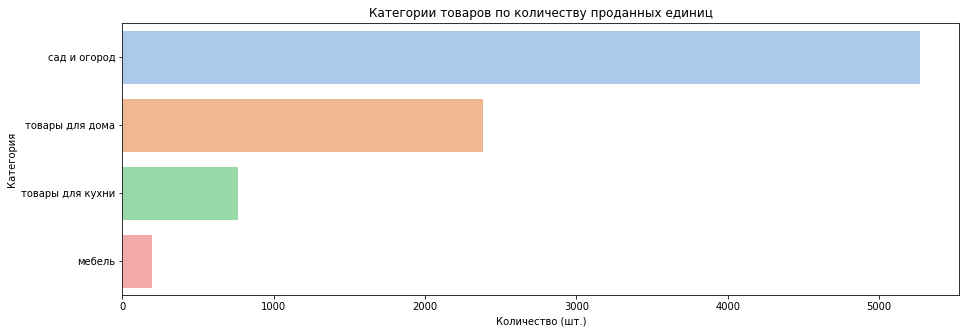

In [29]:
grouped_data = df.groupby('product_type')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_palette('pastel') 
sns.set_style("whitegrid")
sns.barplot(x='quantity', y='product_type', data=grouped_data)
plt.title('Категории товаров по количеству проданных единиц')
plt.xlabel('Количество (шт.)')
plt.ylabel('Категория')
;

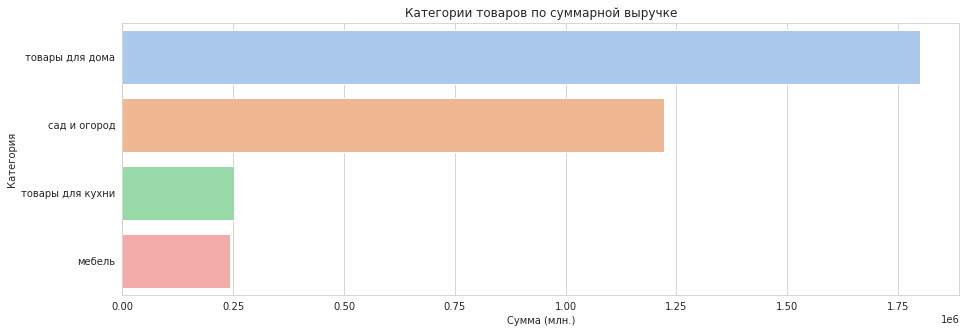

In [30]:
grouped_data2 = df.groupby('product_type')['purchase_amount'].sum().reset_index().sort_values(by='purchase_amount', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_palette('pastel') 
sns.set_style("whitegrid")
sns.barplot(x='purchase_amount', y='product_type', data=grouped_data2)
plt.title('Категории товаров по суммарной выручке')
plt.xlabel('Сумма (млн.)')
plt.ylabel('Категория');

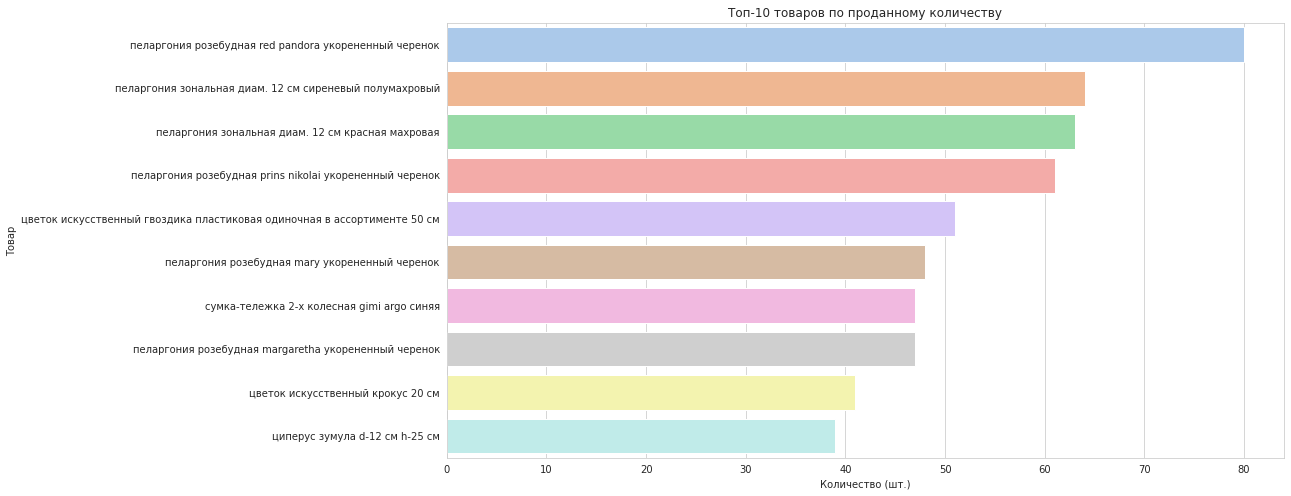

In [31]:
quantity_top = df.groupby('product')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(10)
f, ax = plt.subplots(figsize=(15, 8))
sns.set_palette('pastel') 
sns.set_style("whitegrid")
sns.barplot(x='quantity', y='product', data=quantity_top)
plt.title('Топ-10 товаров по проданному количеству')
plt.xlabel('Количество (шт.)')
plt.ylabel('Товар');

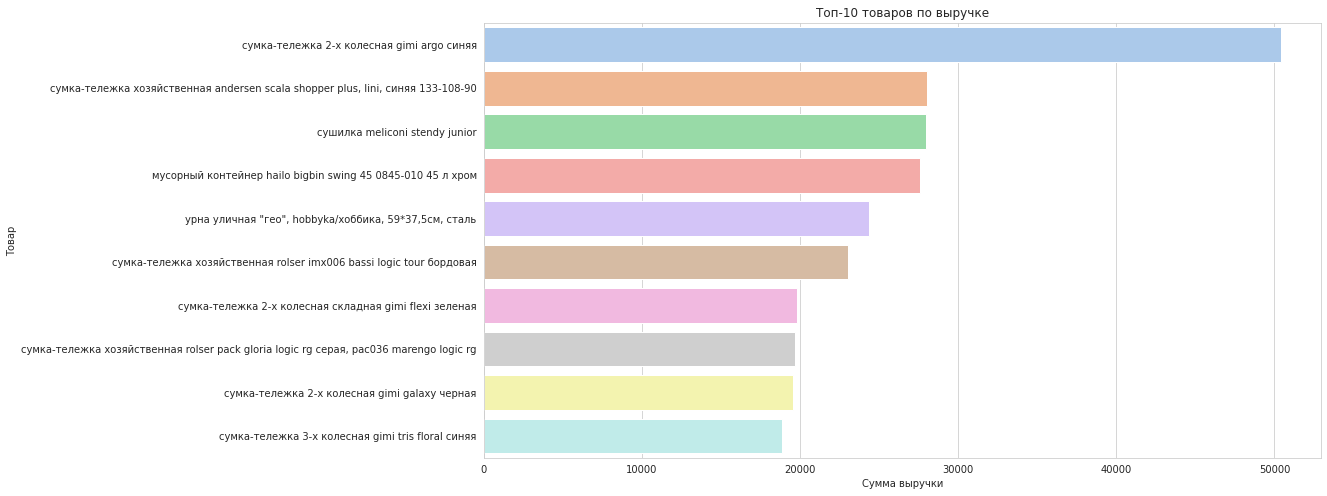

In [32]:
amount_top = df.groupby('product')['purchase_amount'].sum().reset_index().sort_values(by='purchase_amount', ascending=False).head(10)
f, ax = plt.subplots(figsize=(15, 8))
sns.set_palette('pastel') 
sns.set_style("whitegrid")
sns.barplot(x='purchase_amount', y='product', data=amount_top)
plt.title('Топ-10 товаров по выручке')
plt.xlabel('Сумма выручки')
plt.ylabel('Товар');

Самое большое количество товаров было продано в категории "сад и огород". За ней идут "товары для дома", "товары для кухни" и совсем маленькое количество в категории "мебель".
Но при этом если смотреть по суммарной выручке, то категория товаров для дома сильно обгоняет сад и огород по выручке. Товары для кухни и мебель приблизительно равны. 
Самые популярные товары в интернет-магазине - цветы. Особенно Пеларгония. В топ-10 самых продаваемых товаров - 6 его разновидностей. 
По выручке самые прибыльные товары - хозяйственные, в особенности Сумки-тележки, в топ-10 встречаются 7 их разновидностей. 

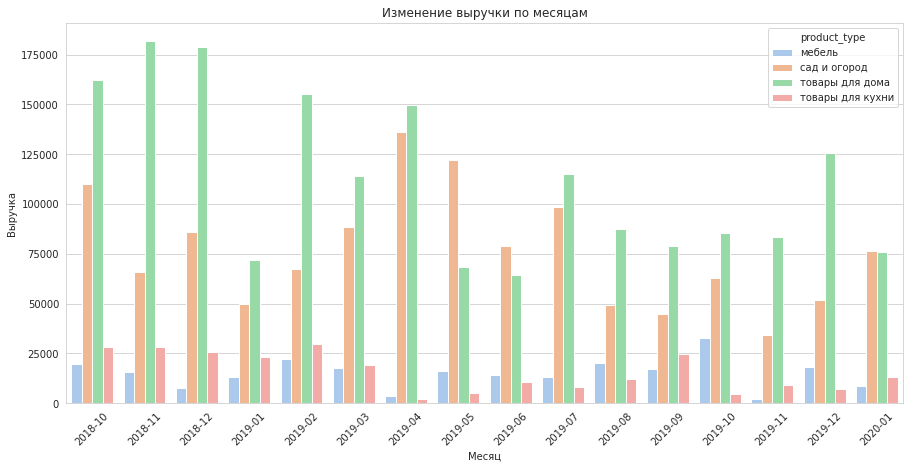

In [33]:
df['month_year'] = df['date'].dt.to_period('M')
grouped_data = df.groupby(by=['month_year', 'product_type'])['purchase_amount'].sum().reset_index()

f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x= 'month_year', y='purchase_amount', data=grouped_data, hue='product_type')
plt.title('Изменение выручки по месяцам')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Выручка');

Большую часть месяцев товары для дома приносят сильно больше выручки, чем товары для сада и огорода и другие категории. 
Особенно это выражено в ноябре, декабре и феврале, где выручка выше более чем в два раза по сравнению со ближайшей категорией. Исключения - май и июнь, когда товары для сада и огорода по выручке обгоняют товары для дома. Также в марте-апреле спрос на них хороший. 
По мебели и товарам для кухни нет очевидного сезонного влияния. Более высокие показатели 2018года не подтверждаются показателями 2019го года. 

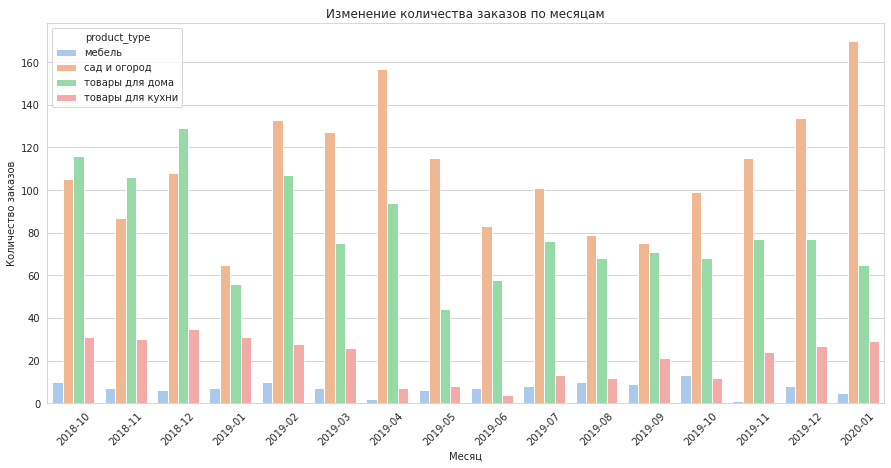

In [34]:
grouped_data = df.groupby(by=['month_year', 'product_type'])['order_id'].nunique().reset_index()

f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x= 'month_year', y='order_id', data=grouped_data, hue='product_type')
plt.title('Изменение количества заказов по месяцам')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

По количеству заказов в 2018 году категория товаров для дома превышала остальные, тогда как с 2019го виден рост продаж товаров для сада и огорода. Большое количество по ним было с февраля по май, летом заказов меньше, а далее с ноября идёт рост с пиком в январе.
Товары для дома хуже всего продавались в январе и мае, а лучше в целом в осенне-зимний период.
По этому графику можно сделать вывод о возможной причине падения выручки магазина: продажи по низкомаржинальной категории (сад и огород) выросли, а по высокомаржинальной категории товаров для дома наоборот идёт снижение.

Вывод.  
Количество уникальных клиентов: 2413  
Количество уникальных заказов: 3492  
Количество заказов на каждого клиента: 1.45  
    
Количество заказов варьируется от месяца к месяцу.
Меньше всего заказов было сделано в июне 2019 г.   
Больше всего в декабре 18го и феврале 19гг., а также апреле 19го и январе 20го.  
В целом видна закономерность большего числа заказов в зимние и весенние месяцы, чем в летние.

При изучении среднего чека мы столкнулись с аномалиями и суммах заказов, вызванных большим количеством повторяющихся товаров. 
Было найдено 93 заказа, где количество одинакового товара было более 20 шт. Эти заказы скорее всего корпоративные или коммерческие и работу с этими покупателями стоило бы передать в оптовый отдел, такие клиенты делают заказы по мере своей необходимости, а не после рекламных рассылок. К ним стоит искать индивидуальный подход. Создали отдельный датафрейм corp_clients, куда занесли только крупные заказы, а из основного датафрейма их удалили, чтобы они не искажали статистику.  
Медианный чек в интернет-магазине: 562.0    
Средний чек падает практически на протяжении всего наблюдения. С 900 он опускается до 200 к концу исследования. Особенно сильные падения были после ноября 2018 г и сентября 2019 г.

Для определения наиболее продаваемых категорий товара, были созданы следующие категории товаров: товары для сада и огорода, товары для дома, товары для кухни и мебель. Все товары были распределены по этим категориям.   
Самое большое количество товаров было продано в категории "сад и огород". За ней идут "товары для дома", "товары для кухни" и совсем маленькое количество в категории "мебель".
Но при этом если смотреть по суммарной выручке, то категория товаров для дома сильно обгоняет сад и огород по выручке. Товары для кухни и мебель приблизительно равны. 
Самые популярные товары в интернет-магазине - цветы. Особенно Пеларгония. В топ-10 самых продаваемых товаров - 6 его разновидностей. 
По выручке самые прибыльные товары - хозяйственные, в особенности Сумки-тележки, в топ-10 встречаются 7 их разновидностей.    
Большую часть месяцев товары для дома приносят сильно больше выручки, чем товары для сада и огорода и другие категории. 
Особенно это выражено в ноябре, декабре и феврале, где выручка выше более чем в два раза по сравнению со ближайшей категорией. Исключения - май и июнь, когда товары для сада и огорода по выручке обгоняют товары для дома. Также в марте-апреле спрос на них хороший. 
По мебели и товарам для кухни нет очевидного сезонного влияния. Более высокие показатели 2018года не подтверждаются показателями 2019го года.    
По количеству заказов в 2018 году категория товаров для дома превышала остальные, тогда как с 2019го виден рост продаж товаров для сада и огорода. Большое количество по ним было с февраля по май, летом заказов меньше, а далее с ноября идёт рост с пиком в январе.
Товары для дома хуже всего продавались в январе и мае, а лучше в целом в осенне-зимний период.
По этому графику можно сделать вывод о возможной причине падения выручки магазина: продажи по низкомаржинальной категории (сад и огород) выросли, а по высокомаржинальной категории товаров для дома наоборот идёт снижение.

## RFM сегментация

RFM — это метод, используемый для анализа потребительской ценности.  
Он группирует клиентов на основе истории их транзакций:   
Recency (Давность) — Как давно клиент совершил покупку?   
Frequency (Частота) — Как часто они совершают покупки?   
Monetary Value (Денежная ценность) — Сколько они тратят?   

In [35]:
# сделаем срез по нужным нам колонкам

rfm = df[['date', 'customer_id', 'order_id', 'purchase_amount']]

In [36]:
NOW = dt.datetime(2020,2,1)   # укажем текущую дату для расчёта Recency
# создадим датафрейм RFM_table и для каждого уникального customer_id рассчитаем Recency, Frequency и Monetary Value
RFM_table=rfm.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'purchase_amount': lambda x: x.sum()})    # Monetary 

In [37]:
RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'purchase_amount': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


In [38]:
# определим квантили, на которые будем делить параметры на три группы
quantiles = RFM_table.quantile(q=[0.33,0.66])
quantiles

,recency,frequency,monetary_value
0.33,100.0,1.0,508.0
0.66,295.0,2.0,1236.0


In [39]:
# Создадим словарь с квантилями для удобства
quantiles = quantiles.to_dict()
##  RFM сегментация 
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3
    
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [40]:
# проверим результат работы функции
RFM_Segment.sample(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
9d2d8c81-ee5b-44b8-90a8-dd6798bd4350,118,1,328.0,2,1,1,211
eb886549-e6e3-4804-acd1-35dfc9027b8d,9,2,1513.0,3,2,3,323
8af95f8f-4dd4-46ef-8572-d52557f274cd,409,1,568.0,1,1,2,112
98e660a4-b3ab-4abb-a94c-ae393f109d02,479,1,239.0,1,1,1,111
f124b272-34bb-4354-a514-8c918dbd2204,346,1,974.0,1,1,2,112


На основании получившихся класстеров разделим клиентов на группы:
- Top_clents - это лучшие клиенты, с максимальными или близкими к максимальным оценками (323, 332, 333)
- Perspective_clients - клиенты, которых можно сделать лучшими, если увеличить количество заказов или средний чек (311, 312, 313, 322, 321, 331)
- Sleeping_clients - спящие клиенты, которые помнят о нас, то есть покупали не так давно (221, 222, 223, 231, 232, 233, 211, 212, 213)
- Outgoing_clients - клиенты на грани ухода (121, 122, 123, 131, 132, 133, 113)
- Lost_clients - потерянные клиенты (111, 112)

In [41]:
# создадим функцию для разделения пользователей на классы  
def Final_classes(string):
    if string['RFMClass'] in ['333', '332', '323']:
        return 'Top_clents'
    elif string['RFMClass'] in ['311', '312', '313', '322', '321', '331']:
        return 'Perspective_clients'
    elif string['RFMClass'] in ['121', '122', '123', '131', '132', '133', '113']:
        return 'Outgoing_clients'
    elif string['RFMClass'] in ['111', '112']:
        return 'Lost_clients'
    else:
        return 'Sleeping_clients'

In [42]:
# применим функцию для разделения пользователей на классы
RFM_Segment['Class'] = RFM_Segment.apply(Final_classes, axis=1)

In [43]:
RFM_Segment = RFM_Segment.reset_index()

In [44]:
RFM_Segment.sample(5)

,customer_id,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Class
1882,cf971740-da80-41a6-acfb-ef934cede4b4,91,2,1497.0,3,2,3,323,Top_clents
1992,db3795d2-a180-4269-81b6-f35848d754a1,73,2,2849.0,3,2,3,323,Top_clents
384,2b4d072c-3dd5-4124-9462-406b3e8403ba,25,2,599.0,3,2,2,322,Perspective_clients
1528,ab46eafd-f9d3-4f91-af42-794d675d9c0c,61,2,261.0,3,2,1,321,Perspective_clients
2299,fba5e196-8533-4805-bca4-6abc919ff10d,408,1,87.0,1,1,1,111,Lost_clients


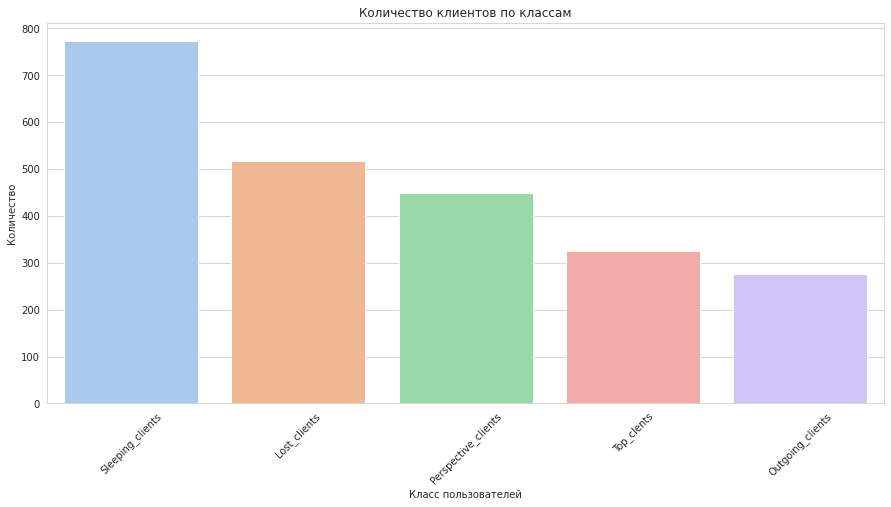

In [45]:
# Визуализируем количество уникальных пользователей в каждом классе

customer_id_by_class = RFM_Segment.reset_index().groupby('Class')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Class', y='customer_id', data=customer_id_by_class)
plt.title('Количество клиентов по классам')
plt.xticks(rotation=45)
plt.xlabel('Класс пользователей')
plt.ylabel('Количество');

Самый большой класс пользователей интернет-магазина - спящие клиенты. Это клиенты, которые делали последнюю покупку не слишком давно, чтобы считать их уходящими, они ещё помнят про нас и нужно приложить усилия для того, чтобы их не потерять и перевести в разряд перспективных или топовых.  
Вторая по размеру группа - потерянные клиенты. Чуть меньше перспективных. 
Топ клиенты и уходящие на последнем месте по количеству. 

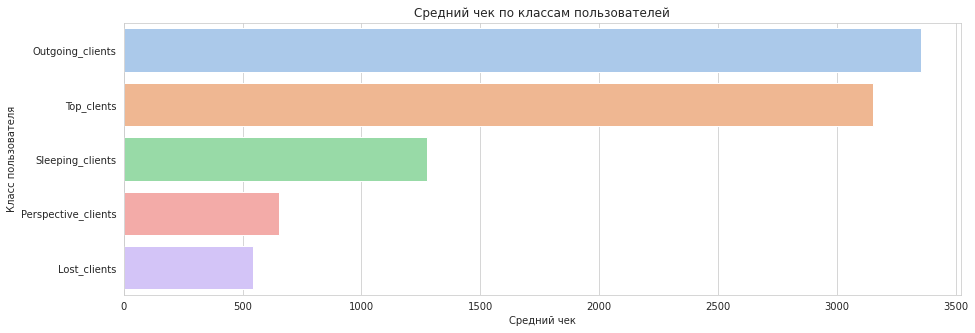

In [46]:
# Визуализируем и сравним средний чек по каждому классу пользователей

f, ax = plt.subplots(figsize=(15, 5))
sns.set_style("darkgrid")
sns.set_palette('pastel') 
sns.barplot(x='monetary_value', y='Class', data=RFM_Segment.groupby(['Class'])['monetary_value'].mean().sort_values(ascending=False).reset_index())
plt.title('Средний чек по классам пользователей')
plt.xlabel('Средний чек')
plt.ylabel('Класс пользователя');

Уходящие клиенты и топ-клиенты имеют самый большой средний чек среди наших классов пользователей. 
Перспективные и потерянные имеют самый маленький средний чек.
Для перспективных клиентов это преимущество - работа с ними может дать самый быстрый результат и рост показателей в моменте.
Про потерянных можно сказать, что магазин как правило теряет не самых прибыльных клиентов.

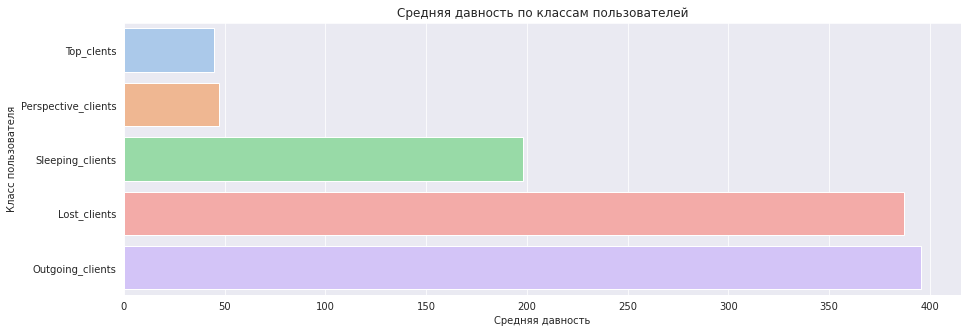

In [47]:
# Визуализируем среднюю давность по каждому классу пользователей

f, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette('pastel') 
sns.barplot(x='recency', y='Class', data=RFM_Segment.groupby(['Class'])['recency'].mean().sort_values().reset_index())
plt.title('Средняя давность по классам пользователей')
plt.xlabel('Средняя давность')
plt.ylabel('Класс пользователя');

Визуально подтверждается разница в средней давности между классами. Самая низкая давность у топ-клиентов и перспективных, далее идут спящие и на в конце потерянные и уходящие.

In [48]:
# выведем средние значения по каждому параметру по всем клиентским классам
RFM_Segment.groupby('Class').mean().T.round(2)

Class,Lost_clients,Outgoing_clients,Perspective_clients,Sleeping_clients,Top_clents
recency,386.99,395.65,47.45,198.22,44.99
frequency,1.00,1.79,1.89,1.15,2.05
monetary_value,545.43,3354.19,651.10,1276.35,3151.71
R_Quartile,1.00,1.00,3.00,2.00,3.00
F_Quartile,1.00,1.25,1.89,1.14,2.00
M_Quartile,1.48,2.83,1.61,1.88,3.00


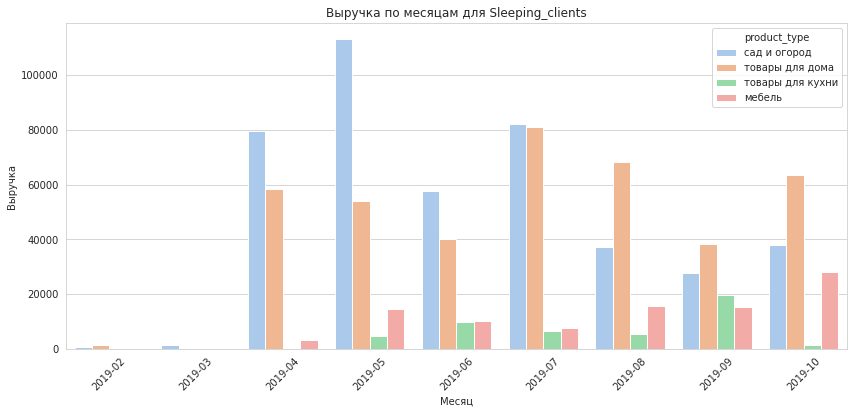

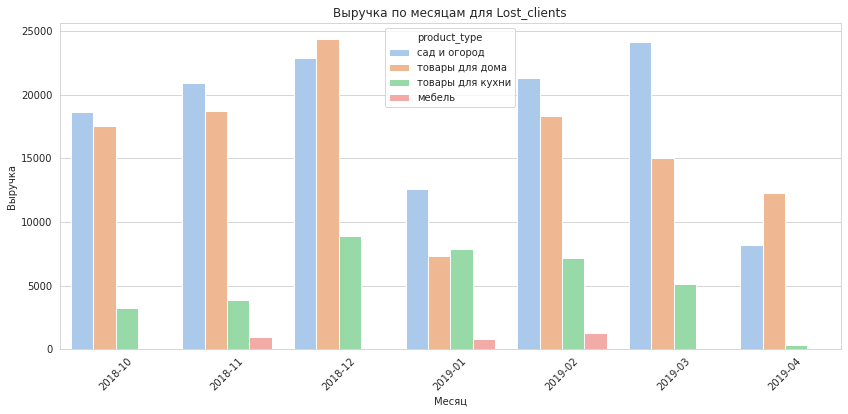

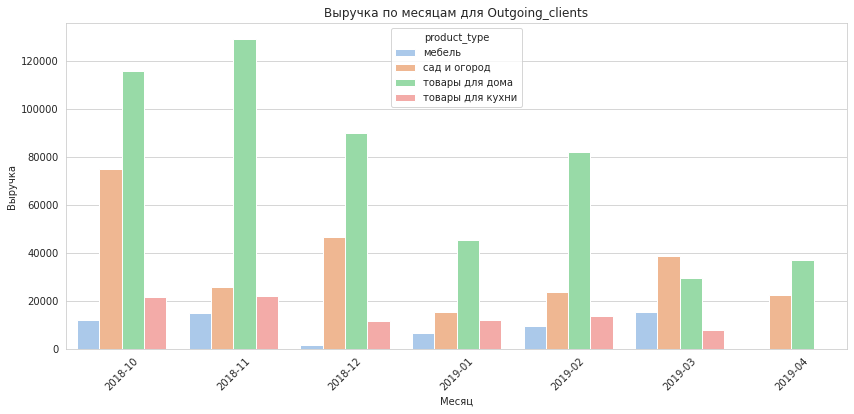

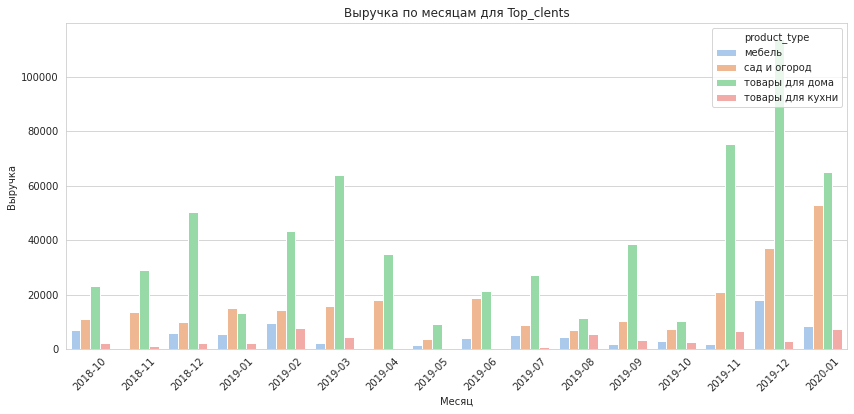

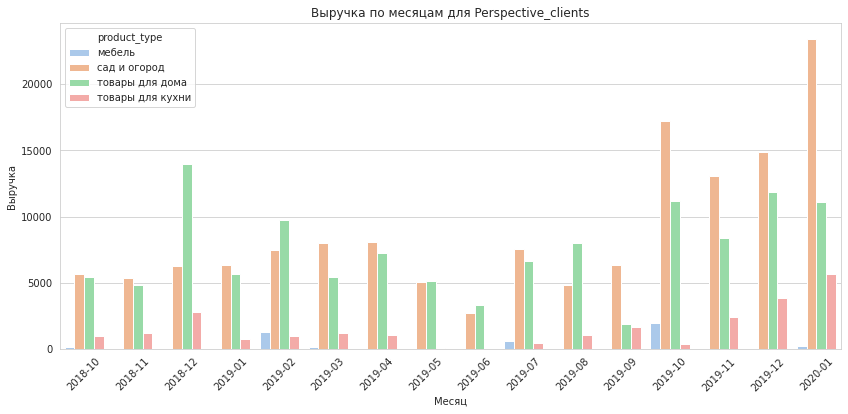

In [49]:
df_merged = df.merge(RFM_Segment, on='customer_id')
class_list = RFM_Segment['Class'].unique()

for i in range(len(class_list)):
    grouped_data = df_merged[df_merged['Class'] == class_list[i]]
    grouped_data = grouped_data.groupby(by=['month_year', 'product_type'])['purchase_amount'].sum().reset_index()
    f, ax = plt.subplots(figsize=(14, 6))
    sns.barplot(x= 'month_year', y='purchase_amount', data=grouped_data, hue='product_type')
    plt.title('Выручка по месяцам для ' + class_list[i])
    plt.xticks(rotation=45)
    plt.xlabel('Месяц')
    plt.ylabel('Выручка');

Вывод  

Был проведён RFM-анализ для оценки потребительской ценности. 

RFM-анализ — метод сегментации клиентов по частоте и сумме покупок для выявления потребителей, приносящих больше денег.
Получилась классификация потребителей по трем значениями с оценками от 1 до 3:

- Recency (Давность сделки). Сколько времени (дней) прошло с момента последней покупки клиента.
- Frequency (Частота сделки). Как часто потребитель совершает покупки.
- Monetary (Вложения). Сколько средств/ресурсов потратил клиент за определенный промежуток времени.  

В итоге мы получили 27 комбинаций оценок от 111 до 333 и на основании получившихся класстеров разделили клиентов на следующие группы:

Top_clents - это лучшие клиенты, с максимальными или близкими к максимальным оценками (323, 332, 333)
Perspective_clients - клиенты, которых можно сделать лучшими, если увеличить количество заказов или средний чек (311, 312, 313, 322, 321, 331)
Sleeping_clients - спящие клиенты, которые помнят о нас, то есть покупали не так давно (221, 222, 223, 231, 232, 233, 211, 212, 213)
Outgoing_clients - клиенты на грани ухода (121, 122, 123, 131, 132, 133, 113)
Lost_clients - потерянные клиенты (111, 112)  

Самый большой класс пользователей интернет-магазина - спящие клиенты. Это клиенты, которые делали последнюю покупку не слишком давно, чтобы считать их уходящими, они ещё помнят про нас и нужно приложить усилия для того, чтобы их не потерять и перевести в разряд перспективных или топовых.  
Вторая по размеру группа - потерянные клиенты. Чуть меньше перспективных. 
Топ клиенты и уходящие на последнем месте по количеству.   

Уходящие клиенты и топ-клиенты имеют самый большой средний чек среди наших классов пользователей. 
Перспективные и потерянные имеют самый маленький средний чек.
Для перспективных клиентов это преимущество - работа с ними может дать самый быстрый результат и рост показателей в моменте.
Про потерянных можно сказать, что магазин как правило теряет не самых прибыльных клиентов.


## Проверка гипотез

Нам требуется определить статистическое различие в средней выручке между классами пользователей

Н0 - Статистически значимых различий в средней выручке заказа нет   
Н1 - Статистически значимые различия в средней выручке заказа есть

Перед проверкой гипотезы нам нужно определить каким тестом воспользоваться. Проверим распределение данных на нормальность. Для этого воспользуемся критерием Шапиро-Уилка

In [50]:
for i in range(len(class_list)):
    group_list = RFM_Segment[RFM_Segment['Class'] == class_list[i]]['monetary_value'].tolist()
    alpha = 0.05
    results = st.shapiro(group_list)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value
    print('Класс клиентов: ', class_list[i])
    print('p-value: ', p_value)
    if p_value < alpha:
        print('\033[31m' + 'Отвергаем нулевую гипотезу: распределение не нормально'+ '\033[0m')
    else:
        print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, распределение нормальное'+'\033[0m') 

Класс клиентов:  Sleeping_clients
p-value:  1.7877765807856016e-41
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Lost_clients
p-value:  4.169333715081658e-12
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Outgoing_clients
p-value:  2.4163610649006718e-33
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Top_clents
p-value:  1.2029267368511929e-23
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Perspective_clients
p-value:  1.8773275374225441e-28
Отвергаем нулевую гипотезу: распределение не нормально


Так как данные не распределены нормально, то нам нужно воспользоваться непараметрическим тестом Уилкоксона-Манна-Уитни.   
Для множественной проверки гипотез также используем поправку по методу Холма, так как она позволяет повысить мощность теста.   Проверим гипотезу и выведем результаты

In [51]:
alpha = 0.05 # критический уровень статистической значимости (стандарт для экономических данных-0.05)

counter = 0
alpha_holm = 0
test_count = 10
for index_0 in range(len(class_list)):
    for index_1 in range(index_0+1, len(class_list)):
        p_value = st.mannwhitneyu(RFM_Segment[RFM_Segment['Class'] == class_list[index_0]]['monetary_value'].tolist(), RFM_Segment[RFM_Segment['Class'] == class_list[index_1]]['monetary_value'].tolist(), alternative='two-sided')[1]

        print('Группa клиентов A:', class_list[index_0])
        print('Группa клиентов B:', class_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        alpha_holm += (alpha / (test_count - counter))
        print('Уровень значимости с поправкой Холма: ', alpha_holm)
        print('Средняя выручка группы A: {:.0f}'.format(RFM_Segment[RFM_Segment['Class'] == class_list[index_0]]['monetary_value'].mean()))
        print('Средняя выручка группы B: {:.0f}'.format(RFM_Segment[RFM_Segment['Class'] == class_list[index_1]]['monetary_value'].mean()))
        
        if p_value < alpha_holm:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')
        counter +=1

Группa клиентов A: Sleeping_clients
Группa клиентов B: Lost_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.005
Средняя выручка группы A: 1276
Средняя выручка группы B: 545
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Outgoing_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.010555555555555556
Средняя выручка группы A: 1276
Средняя выручка группы B: 3354
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Top_clents
p_value: 0.000
Уровень значимости с поправкой Холма:  0.016805555555555556
Средняя выручка группы A: 1276
Средняя выручка группы B: 3152
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Perspective_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.023948412698412698
Средняя выручка группы A: 1276
Средняя выручка группы B: 651
Отвергаем н

Все тесты позволяют нам отвергнуть нулевую гипотезу и принять первую: между группами есть статистически значимая разница в среднем чеке пользователей. 

Теперь определим статистическое различие в средней давности с момента последнего заказа между классами пользователей

Н0 - Статистически значимых различий в среднем уровне давности нет  
Н1 - Статистически значимые различия в среднем уровне давности есть

Также проверим данные на нормальность

In [52]:
for i in range(len(class_list)):
    group_list = RFM_Segment[RFM_Segment['Class'] == class_list[i]]['recency'].tolist()
    alpha = 0.05
    results = st.shapiro(group_list)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value
    print('Класс клиентов: ', class_list[i])
    print('p-value: ', p_value)
    if p_value < alpha:
        print('\033[31m' + 'Отвергаем нулевую гипотезу: распределение не нормально'+ '\033[0m')
    else:
        print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, распределение нормальное'+'\033[0m') 

Класс клиентов:  Sleeping_clients
p-value:  2.6611325093755735e-17
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Lost_clients
p-value:  1.052682593871701e-11
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Outgoing_clients
p-value:  7.80110642750742e-10
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Top_clents
p-value:  2.5838344797080026e-09
Отвергаем нулевую гипотезу: распределение не нормально
Класс клиентов:  Perspective_clients
p-value:  9.05415412782995e-12
Отвергаем нулевую гипотезу: распределение не нормально


Так как данные не распределены нормально, то нам нужно воспользоваться непараметрическим тестом Уилкоксона-Манна-Уитни.   
Для множественной проверки гипотез также используем поправку по методу Холма, так как она позволяет повысить мощность теста.   Проверим гипотезу и выведем результаты

In [53]:
alpha = 0.05 # критический уровень статистической значимости (стандарт для экономических данных-0.05)

counter = 0
alpha_holm = 0
test_count = 10
for index_0 in range(len(class_list)):
    for index_1 in range(index_0+1, len(class_list)):
        p_value = st.mannwhitneyu(RFM_Segment[RFM_Segment['Class'] == class_list[index_0]]['recency'].tolist(), RFM_Segment[RFM_Segment['Class'] == class_list[index_1]]['recency'].tolist(), alternative='two-sided')[1]

        print('Группa клиентов A:', class_list[index_0])
        print('Группa клиентов B:', class_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        alpha_holm += (alpha / (test_count - counter))
        print('Уровень значимости с поправкой Холма: ', alpha_holm)
        print('Средний уровень давности группы A: {:.0f}'.format(RFM_Segment[RFM_Segment['Class'] == class_list[index_0]]['recency'].mean()))
        print('Средний уровень давности группы B: {:.0f}'.format(RFM_Segment[RFM_Segment['Class'] == class_list[index_1]]['recency'].mean()))
        
        if p_value < alpha_holm:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')
        counter +=1

Группa клиентов A: Sleeping_clients
Группa клиентов B: Lost_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.005
Средний уровень давности группы A: 198
Средний уровень давности группы B: 387
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Outgoing_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.010555555555555556
Средний уровень давности группы A: 198
Средний уровень давности группы B: 396
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Top_clents
p_value: 0.000
Уровень значимости с поправкой Холма:  0.016805555555555556
Средний уровень давности группы A: 198
Средний уровень давности группы B: 45
Отвергаем нулевую гипотезу: разница статистически значима

Группa клиентов A: Sleeping_clients
Группa клиентов B: Perspective_clients
p_value: 0.000
Уровень значимости с поправкой Холма:  0.023948412698412698
Средний уровень давности

Во всех тестах, кроме двух, мы отвергаем нулевую гипотезу и принимаем альтернативную, о том, что есть статистически значимая разница в давности между группами пользователей. Не смотря на это, благодаря первому тесту, в котором мы везде приняли альтернативную гипотезу мы можем быть уверенны, что кластеризацию пользователей мы провели корректно. 

Вывод  

Были сформулированы и проверены две гипотезы. 
Первая гипотеза: о статистическо значимом различии в средней выручке между классами пользователей (Н0 - Статистически значимых различий в средней выручке заказа нет и Н1 - Статистически значимые различия в средней выручке заказа есть)
Вторая гипотеза: о статистическо значимом различии в средней давности с момента последнего заказа между классами пользователей (Н0 - Статистически значимых различий в среднем уровне давности нет, Н1 - Статистически значимые различия в среднем уровне давности есть)  
В обоих случаях была проведена проверка данных на нормальность распределения с помощью критерия Шапиро-Уилка и так как данные нормально не распределены гипотезы проверялись тестом Уилкоксона-Манна-Уитни. 

Все тесты первой гипотезы позволяют нам отвергнуть нулевую гипотезу и принять альтернативную: между группами есть статистически значимая разница в среднем чеке пользователей.
Во всех тестах второй гипотезы, кроме двух, мы отвергаем нулевую гипотезу и принимаем альтернативную, о том, что есть статистически значимая разница в давности между группами пользователей.  
Не смотря на это, благодаря первому тесту, в котором мы везде приняли альтернативную гипотезу мы можем быть уверенны, что кластеризацию пользователей мы провели корректно. 

    


## Общие выводы и рекомендации

### Выводы

Было проведено исследование датафрейма, содержащего позиции из заказов пользователей: номер пользователя, номер заказа, количество, цену и название товара.
Заказы были сделаны в интервале: с 2018-10-01 до 2020-01-31
Количество строк в датафрейме - 7474. Пропусков нет, колонки проименованы корректно.
Сменили тип данных колонки date на datetime для возможности дальнейшей работы с данными, как с датой.
Остальные типы данных оставили как есть.
Было найдено и удалено 1864 повторяющихся строки. Также были найдены и удалены заказы, сделанные разными пользователями.
После предобработки осталось 5544 строки, было удалено 25,8 % данных.  

Количество уникальных клиентов: 2413  
Количество уникальных заказов: 3492  
Количество заказов на каждого клиента: 1.45  
Медианный чек в интернет-магазине: 562.0  
    
Количество заказов варьируется от месяца к месяцу.
Меньше всего заказов было сделано в июне 2019 г.   
Больше всего в декабре 18го и феврале 19гг., а также апреле 19го и январе 20го.  
В целом видна закономерность большего числа заказов в зимние и весенние месяцы, чем в летние.

При изучении среднего чека мы столкнулись с аномалиями в суммах заказов, вызванных большим количеством повторяющихся товаров. 
Эти заказы скорее всего корпоративные или коммерческие. Создали отдельный датафрейм corp_clients, куда занесли только крупные заказы, а из основного датафрейма их удалили, чтобы они не искажали статистику.  
  
Средний чек падает практически на протяжении всего наблюдения. С 900 он опускается до 200 к концу исследования. Особенно сильные падения были после ноября 2018 г и сентября 2019 г.

Для определения наиболее продаваемых категорий товара, были созданы следующие категории товаров: товары для сада и огорода, товары для дома, товары для кухни и мебель. Все товары были распределены по этим категориям.   
Самое большое количество товаров было продано в категории "сад и огород" и "товары для дома". Но при этом если смотреть по суммарной выручке, то категория товаров для дома сильно обгоняет сад и огород по выручке.
Самые популярные товары в интернет-магазине - цветы. Особенно Пеларгония. В топ-10 самых продаваемых товаров - 6 его разновидностей. 
По выручке самые прибыльные товары - хозяйственные, в особенности Сумки-тележки, в топ-10 встречаются 7 их разновидностей. 

Большую часть месяцев товары для дома приносят сильно больше выручки, чем товары для сада и огорода и другие категории. 
Особенно это выражено в ноябре, декабре и феврале, где выручка выше более чем в два раза по сравнению со ближайшей категорией. Исключения - май и июнь, когда товары для сада и огорода по выручке обгоняют товары для дома. Также в марте-апреле спрос на них хороший. 
По мебели и товарам для кухни нет очевидного сезонного влияния. Более высокие показатели 2018года не подтверждаются показателями 2019го года.    
По количеству заказов в 2018 году категория товаров для дома превышала остальные, тогда как с 2019го виден рост продаж товаров для сада и огорода. Большое количество по ним было с февраля по май, летом заказов меньше, а далее с ноября идёт рост с пиком в январе.
Товары для дома хуже всего продавались в январе и мае, а лучше в целом в осенне-зимний период.

Был проведён RFM-анализ для оценки потребительской ценности.

RFM-анализ — метод сегментации клиентов по частоте и сумме покупок для выявления потребителей, приносящих больше денег. Получилась классификация потребителей по трем значениями с оценками от 1 до 3:

Recency (Давность сделки). Сколько времени (дней) прошло с момента последней покупки клиента.
Frequency (Частота сделки). Как часто потребитель совершает покупки.
Monetary (Вложения). Сколько средств/ресурсов потратил клиент за определенный промежуток времени.
В итоге мы получили 27 комбинаций оценок от 111 до 333 и на основании получившихся класстеров разделили клиентов на группы. 

Самый большой класс пользователей интернет-магазина - спящие клиенты. Это клиенты, которые делали последнюю покупку не слишком давно, чтобы считать их уходящими, они ещё помнят про нас и нужно приложить усилия для того, чтобы их не потерять и перевести в разряд перспективных или топовых.
Вторая по размеру группа - потерянные клиенты. Чуть меньше перспективных. Топ клиенты и уходящие на последнем месте по количеству.

Уходящие клиенты и топ-клиенты имеют самый большой средний чек среди наших классов пользователей. Перспективные и потерянные имеют самый маленький средний чек. Для перспективных клиентов это преимущество - работа с ними может дать самый быстрый результат и рост показателей в моменте. Про потерянных можно сказать, что магазин как правило теряет не самых прибыльных клиентов.

Была подтверждена статистически значимая разница в среднем чеке и средней давности между классами пользователей, что означает правильность проведенной нами класстеризации.

### Рекомендации
   
   

1) Заказы корпоративных и оптовых клиентов были сохранены в отдельную таблицу corp_clients. Про них нельзя забывать, нужно поддерживать и развивать этих клиентов, но не методом рекламных рассылок, а в индивидуальном порядке, следует передать этих клиентов в корпоративный отдел, если он есть, или поручить отдельному менеджеру. 

2) Top clients. Это лучшие клиенты, с максимальными или близкими к максимальным оценками (323, 332, 333). Важно убедить, что мы их ценим, показать им, что они особенные. Что можно сделать:

- попросить оставить отзыв;
- предложить персональное обслуживание;
- просто польстить им и подарить ощущение удовольствия от пользования нашим продуктом.  

Покупатели данной категории больше всего покупают товары для дома. В особенности в апреле и с ноября по январь.

3) Perspective clients. Клиенты, которых можно сделать лучшими, если увеличить количество заказов или средний чек (311, 312, 313, 322, 321, 331). Это отдельный сегмент так называемых «китов», работа с которыми даёт самый быстрые результаты и рост показателей в моменте. Это клиенты, которые купили на большую сумму — потенциальные VIP, поэтому нужно постараться удержать их интерес здесь и сейчас, выяснить его пожелания, потребности и интересы, увеличить средний чек. Что можно сделать:

- подборку сопутствующих товаров
- уведомление с персональными рекомендациями

Покупатели данного сегмента больше покупали товары для сада и огорода, особенно с октября по январь.

4) Sleeping clients. Эти клиенты помнят о нас, то есть покупали не так давно, поэтому тональность и предлагаемые акции должны это учитывать. Коммуникация должна выстраиваться вокруг демонстрации ваших преимуществ. Клиенты, которые перестали покупать недавно, также хороший источник инсайтов, а ещё они обычно ценят внимание, поэтому можно предложить им пройти опрос или зовём на интервью. Что можно сделать:

- рассылку с выгодными акциями и предложениями;
- подборку профессиональных рекомендаций.   

Покупатели данного сегмента больше покупают товары для сада и огорода с мая по июль. А также товары для дома с июля по октябрь.

5) Outgoing clients. Клиенты на грани ухода. Эти клиенты более перспективные, чем потерянные, но всё-таки уже на грани. Исследование показало, что это самый малочисленный класс пользователей, при этом имеющий самый большой средний чек. Ценность таких клиентов для нас не только в их возвращении, но и в выяснении причины, по которой они ушли от вас. Вернуть клиентов будет нелегко, но выяснение причины их ухода поможет компании в будущем. Что можно сделать:

- отправить скидку, купон на покупку или новость про распродажу;
- сделать персональную подборку товаров;
- отправить полезные видео или статьи.

Покупатели данного сегмента больше всего покупали товары для дома в зимние месяцы. 

6) Lost clients. Потерянные клиенты. На самых давних клиентов не стоит тратить много времени и усилий. Можно, конечно, попробовать их вернуть. Но работать с ними лучше, когда уже решены все вопросы с основными сегментами, если остались силы, время и ресурс. Что можно сделать:

- рассказывать об акциях;
- прислать промокод;

Покупатели данного сегмента больше всего покупали товары для сада и огорода и чуть меньше товаров для дома в зимнее время. 

При невозможности проводить регулярные рассылки по всем пользователям и в течение всего года, лучше всего сосредоточиться на рекомендации товаров по категориям товары для дома и товары для сада и огорода, в особенности с сентября по декабрь, а также в апреле (только для сада и огорода) так как в эти месяцы повышается спрос на данного рода товары. 


